In [12]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [58]:
cleaned_text = []

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Foundation
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
ps = PorterStemmer()

In [61]:
lemma = WordNetLemmatizer()

In [62]:
for i in range(len(df['v2'])):
    
    text = re.sub('[^a-zA-Z ]', '', df['v2'][i])
    
    text = text.split()
    
    lemma_tokens = [lemma.lemmatize(w) for w in text if w not in stopwords.words('english')]
    
    my_text=' '.join(lemma_tokens)
    
    cleaned_text.append(my_text)
    
    
    
    
    
    
    

In [63]:
type(cleaned_text)

list

In [18]:
from wordcloud import WordCloud

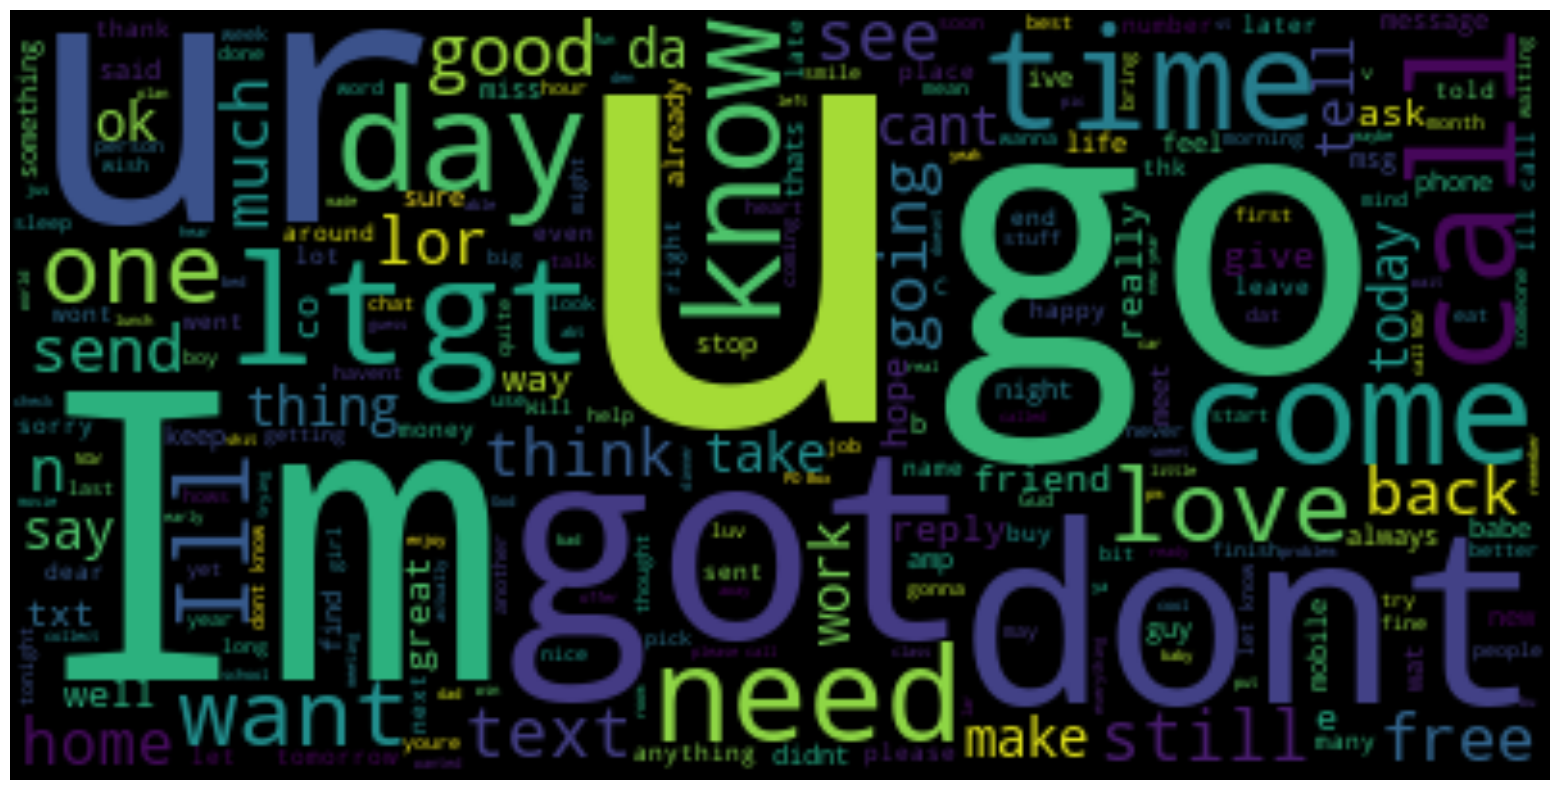

In [65]:
wc = WordCloud(background_color='black', max_words=399).generate(''.join(cleaned_text))
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [26]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<AxesSubplot:xlabel='v1', ylabel='count'>

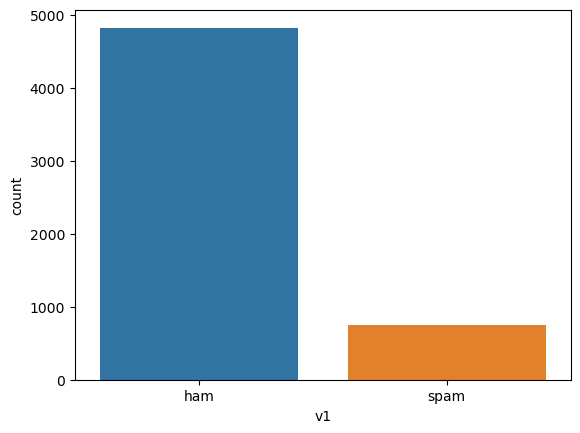

In [27]:
sns.countplot(data=df, x='v1')

In [28]:
len(cleaned_text)

408564

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf = TfidfVectorizer()

In [68]:
tfidf.fit(cleaned_text)

TfidfVectorizer()

In [69]:
features = tfidf.transform(cleaned_text)

In [70]:
features

<5572x8109 sparse matrix of type '<class 'numpy.float64'>'
	with 49348 stored elements in Compressed Sparse Row format>

In [76]:
y = df['v1']

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [78]:
encoder = LabelEncoder()

In [79]:
encoder.fit(y)

LabelEncoder()

In [80]:
target = encoder.transform(y)

In [81]:
target

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=33)

In [84]:
X_train

<3900x8109 sparse matrix of type '<class 'numpy.float64'>'
	with 34552 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
tree = DecisionTreeClassifier()

In [87]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
pred = tree.predict(X_test)

In [89]:
pred

array([0, 0, 0, ..., 1, 1, 0])

In [90]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report

In [97]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1462
           1       0.81      0.86      0.84       210

    accuracy                           0.96      1672
   macro avg       0.90      0.92      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [93]:
confusion_matrix(pred, y_test)

array([[1420,   42],
       [  29,  181]], dtype=int64)

In [98]:
accuracy_score(pred, y_test)

0.9575358851674641

In [106]:
q = ['You have been shortlisted to win pricess up to 20/- Please click here to claim your money']

In [107]:
q = tfidf.transform(q)

In [108]:
q

<1x8109 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [109]:
p = tree.predict(q)

In [110]:
p

array([1])

In [111]:
encoder.inverse_transform(p)

array(['spam'], dtype=object)